### 起手式：匯入常用的函式庫

In [35]:
#矩陣運算之numpy及數據操作分析之pandas
import numpy as np
import pandas as pd

#畫圖用之matplotlib (seaborn較為方便使用)
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
#!pip install seaborn

### 第一步：將檔案讀入並檢查

In [3]:
#讀入訓練資料train.csv與測試資料test.csv
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
#檢查資料筆數與欄位數量
print(train_data.shape)
print(test_data.shape)

(1460, 81)
(1459, 80)


In [5]:
#印個幾筆來看看
train_data.head(6)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [6]:
#可利用set_option設置更詳細的檢視參數
pd.set_option('display.max_columns',None)
#train_data.head(6)

In [7]:
#其他常見的檢查指令
#train_data.columns
#train_data.describe()

### 第二步：觀察訓練資料的離群值

In [8]:
#欄位內容：數字or類別？
#train_data.dtypes
train_data.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [9]:
train_data.select_dtypes(include='float64').describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

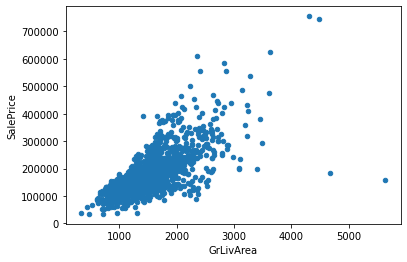

In [10]:
#一筆一筆的畫圖看，例如畫每一筆資料對於Label的散佈圖
var = 'GrLivArea'
train_data.plot.scatter(x=var,y='SalePrice')

#考量可能有缺失值影響到畫圖，
#先用train_data[var].isnull()將空值挑出(輸出長度相同的布林值)
#再利用train_data.loc[train_data[var].isnull()]抓出空值所在的那幾筆
#利用.index留下索引位置後，透過drop丟棄有空值的資料後再繪圖

# var = 'LotFrontage'
# plotdata= train_data.drop(train_data.loc[train_data[var].isnull()].index)
# plotdata.plot.scatter(x=var, y='SalePrice');

In [11]:
#刪除懷疑是離群值的資料
train_data = train_data.drop(train_data[(train_data['GrLivArea']>4000) & (train_data['SalePrice']<300000)].index)

### 第三步：取出Label，並合併訓練資料和測試資料

In [12]:
#觀察房屋售價的資料(觀察Label)
train_data['SalePrice'].describe()

count      1458.000000
mean     180932.919067
std       79495.055285
min       34900.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/home/h282475249/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


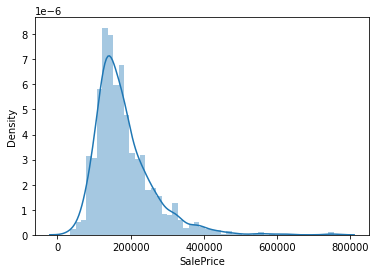

In [36]:
#觀察y的直方圖
sns.distplot(train_data['SalePrice']);
# plt.hist(train_data['SalePrice'],bins=40)
# plt.show()

In [15]:
#算偏態係數
from scipy.stats import skew,boxcox_normmax
train_data['SalePrice'].skew()

1.8812964895244009

In [16]:
#將Label從訓練資料拿出來
#y_train=train_data['SalePrice'].values

#利用取Log的技巧提升訓練成效
y_train=np.log1p(train_data['SalePrice'].values)

In [17]:
#合併訓練集與測試集(方便一起作處理)
all_data=pd.concat([train_data,test_data],sort=False).reset_index(drop=True)

In [18]:
#刪除訓練資料裡的Label與ID
all_data.drop('SalePrice', axis=1, inplace=True)
all_data.drop('Id', axis=1, inplace=True)

In [19]:
#看每個欄位格式
#all_data.dtypes

In [20]:
#利用.select_dtypes選擇想看的欄位，搭配describe能看到更多細節
#all_data.select_dtypes(include='float64').describe()

In [21]:
all_data.shape

(2917, 79)

### 第四步：處理缺失值(數值)

In [22]:
all_data.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [23]:
#快速檢查的方式
all_data.select_dtypes(include=['int64']).isnull().sum()

MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

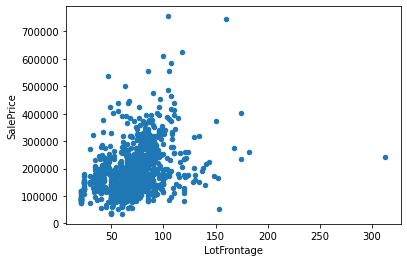

In [24]:
#一筆一筆的畫圖看，有助於決定如何補值
var = 'LotFrontage'
plotdata= train_data.drop(train_data.loc[train_data[var].isnull()].index)
data = pd.concat([plotdata['SalePrice'], plotdata[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice');

In [25]:
#關於停車的部份，沒有填車位的都補0(沒有)
for col in ('GarageArea', 'GarageCars','GarageYrBlt'):
    all_data[col] = all_data[col].fillna(0)

In [26]:
#沒有填的都補0
for col in ('BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','MasVnrArea'):
    all_data[col]=all_data[col].fillna(0)

In [27]:
#到街道的直線距離補期望值(平均數或中位數)
#all_data['LotFrontage']=all_data['LotFrontage'].fillna(all_data['LotFrontage'].mean())

#進階補值的方式：根據Neighborhood分群再補值
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

### 第五步：處理缺失值(類別)

In [28]:
#快速檢查的方式
#all_data.select_dtypes(include=['object']).isnull().sum()
all_data.select_dtypes(include=['object']).isnull().sum()[all_data.select_dtypes(include=['object']).isnull().sum()>0]

MSZoning           4
Alley           2719
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
Electrical         1
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
PoolQC          2908
Fence           2346
MiscFeature     2812
SaleType           1
dtype: int64

In [30]:
#透過unique、value_counts等可以一筆一筆觀察
var = 'MasVnrType'
all_data[var].value_counts()

None       1742
BrkFace     879
Stone       247
BrkCmn       25
Name: MasVnrType, dtype: int64

<AxesSubplot:xlabel='PoolQC', ylabel='SalePrice'>

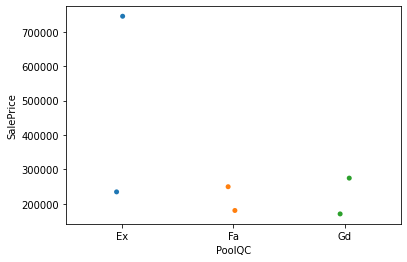

In [37]:
#一筆一筆的畫圖看
var = 'PoolQC'
sns.stripplot(x=var, y='SalePrice', data=train_data,jitter=True)

In [38]:
#補上NA
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    all_data[col] = all_data[col].fillna('None')
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [39]:
all_data['MasVnrType']=all_data['MasVnrType'].fillna('None')
all_data['FireplaceQu']=all_data['FireplaceQu'].fillna('None')

In [40]:
#補上眾數
for col in ('Functional','Exterior1st','Exterior2nd','KitchenQual','SaleType','Electrical'):
    all_data[col]=all_data[col].fillna(all_data[col].mode()[0])

In [41]:
#all_data['MSZoning']=all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
#進階補值的方式：根據MSSubClass分群再補值
all_data['MSZoning'] = all_data.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

In [42]:
#以下欄位，考量刪除Utilities和Alley、MiscFeature、Fence
for col in ('Utilities','Alley','MiscFeature','Fence'):
    all_data = all_data.drop([col], axis=1)

In [43]:
#PoolQC缺值太多，可考慮刪除或是二值化
#all_data['PoolQC'] = all_data['PoolQC'].fillna('None')
#all_data['hasPool'] = all_data['PoolQC'].apply(lambda x: 0 if x == 'None' else 1)
all_data = all_data.drop('PoolQC', axis=1)

In [44]:
#最後可以再檢查一次是否有缺值
# total = all_data.isnull().sum().sort_values(ascending=False)
# percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
# missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# missing_data.head(10)

### 第六步：更進一步檢視欄位(數值)

In [45]:
all_data.select_dtypes(include=['int64','float64']).head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008
5,50,85.0,14115,5,5,1993,1995,0.0,732.0,0.0,64.0,796.0,796,566,0,1362,1.0,0.0,1,1,1,1,5,0,1993.0,2.0,480.0,40,30,0,320,0,0,700,10,2009
6,20,75.0,10084,8,5,2004,2005,186.0,1369.0,0.0,317.0,1686.0,1694,0,0,1694,1.0,0.0,2,0,3,1,7,1,2004.0,2.0,636.0,255,57,0,0,0,0,0,8,2007
7,60,80.0,10382,7,6,1973,1973,240.0,859.0,32.0,216.0,1107.0,1107,983,0,2090,1.0,0.0,2,1,3,1,7,2,1973.0,2.0,484.0,235,204,228,0,0,0,350,11,2009
8,50,51.0,6120,7,5,1931,1950,0.0,0.0,0.0,952.0,952.0,1022,752,0,1774,0.0,0.0,2,0,2,2,8,2,1931.0,2.0,468.0,90,0,205,0,0,0,0,4,2008
9,190,50.0,7420,5,6,1939,1950,0.0,851.0,0.0,140.0,991.0,1077,0,0,1077,1.0,0.0,1,0,2,2,5,2,1939.0,1.0,205.0,0,4,0,0,0,0,0,1,2008


<AxesSubplot:xlabel='MoSold', ylabel='SalePrice'>

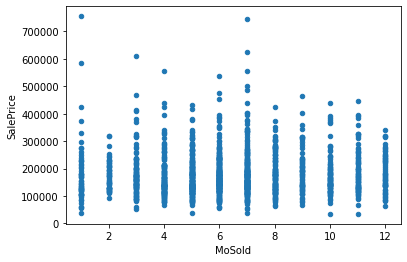

In [46]:
#有一些數值欄位名為數字實為類別
var = 'MoSold'
train_data.plot.scatter(x=var,y='SalePrice')

In [47]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

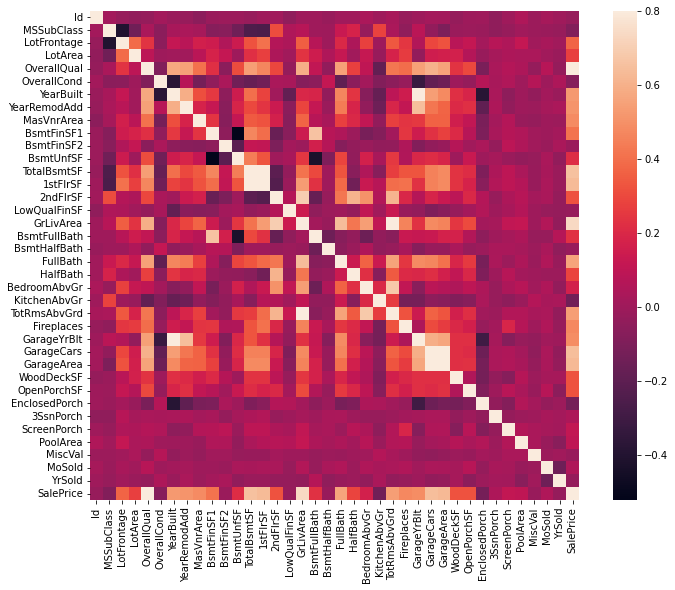

In [48]:
#看每個欄位的相關係數
corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.8, square=True);

In [49]:
#列出跟售價高度相關的
k=10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
print(cols)
# cm = np.corrcoef(train_data[cols].values.T)
# sns.set(font_scale=1.1)
# hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 9}, yticklabels=cols.values, xticklabels=cols.values)
# plt.show()

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars',
       '1stFlrSF', 'GarageArea', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')


In [50]:
#嘗試創造一些特徵
all_data['YrBltAndRemod']=all_data['YearBuilt']*all_data['YearRemodAdd']
all_data['TotalSF']=all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

all_data['Total_sqr_footage'] = (all_data['BsmtFinSF1'] + all_data['BsmtFinSF2'] +
                                 all_data['1stFlrSF'] + all_data['2ndFlrSF'])

all_data['Total_Bathrooms'] = (all_data['FullBath'] + (0.5 * all_data['HalfBath']) +
                               all_data['BsmtFullBath'] + (0.5 * all_data['BsmtHalfBath']))

all_data['Total_porch_sf'] = (all_data['OpenPorchSF'] + all_data['3SsnPorch'] +
                              all_data['EnclosedPorch'] + all_data['ScreenPorch'] +
                              all_data['WoodDeckSF'])

### 第七步：更進一步檢視欄位(類別)

In [51]:
all_data.select_dtypes(include=['object']).head(10)

,MSSubClass,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,2,2008,WD,Normal
1,20,RL,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,5,2007,WD,Normal
2,60,RL,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,9,2008,WD,Normal
3,70,RL,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,2,2006,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,12,2008,WD,Normal
5,50,RL,Pave,IR1,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,Wood,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,None,Attchd,Unf,TA,TA,Y,10,2009,WD,Normal
6,20,RL,Pave,Reg,Lvl,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,8,2007,WD,Normal
7,60,RL,Pave,IR1,Lvl,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,Gable,CompShg,HdBoard,HdBoard,Stone,TA,TA,CBlock,Gd,TA,Mn,ALQ,BLQ,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,11,2009,WD,Normal
8,50,RM,Pave,Reg,Lvl,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Wd Shng,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,Gd,Y,FuseF,TA,Min1,TA,Detchd,Unf,Fa,TA,Y,4,2008,WD,Abnorml
9,190,RL,Pave,Reg,Lvl,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,BrkTil,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,Gd,TA,Y,1,2008,WD,Normal


In [52]:
all_data.select_dtypes(include=['object']).describe()

,MSSubClass,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
count,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917
unique,16,5,2,4,4,5,3,25,9,8,5,8,6,7,15,16,4,4,5,6,5,5,5,7,7,6,5,2,5,4,7,6,7,4,6,6,3,12,5,9,6
top,20,RL,Pave,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,None,Attchd,Unf,TA,TA,Y,6,2007,WD,Normal
freq,1079,2265,2905,1859,2622,2132,2776,443,2511,2888,2423,1471,2310,2875,1026,1015,1766,1798,2536,1306,1283,2604,1904,851,2491,2872,1491,2721,2670,1493,2717,1420,1722,1230,2602,2652,2639,503,691,2526,2402


<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

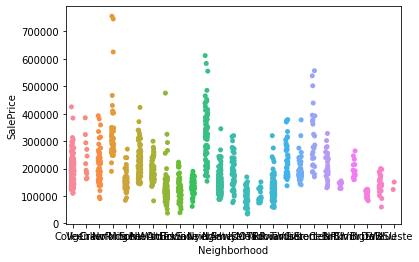

In [53]:
#一筆一筆的畫圖看
var = 'Neighborhood'
sns.stripplot(x=var, y='SalePrice', data=train_data,jitter=True)

In [54]:
#考量刪除欄位
all_data = all_data.drop(['Street'], axis=1)

In [55]:
#重新合併，避免欄位太細
all_data["oNeighborhood"] = all_data.Neighborhood.map({'MeadowV':1,
                                               'IDOTRR':2, 'BrDale':2,
                                               'OldTown':3, 'Edwards':3, 'BrkSide':3,
                                               'Sawyer':4, 'Blueste':4, 'SWISU':4, 'NAmes':4,
                                               'NPkVill':5, 'Mitchel':5,
                                               'SawyerW':6, 'Gilbert':6, 'NWAmes':6,
                                               'Blmngtn':7, 'CollgCr':7, 'ClearCr':7, 'Crawfor':7,
                                               'Veenker':8, 'Somerst':8, 'Timber':8,
                                               'StoneBr':9,
                                               'NoRidge':10, 'NridgHt':10})
all_data = all_data.drop(['Neighborhood'], axis=1)

### 第八步：資料轉換

In [56]:
from scipy.stats import norm, skew, boxcox_normmax
from scipy.special import boxcox1p

In [57]:
#看偏態係數
numeric_feats = all_data.dtypes[all_data.dtypes != 'object'].index

skew_features = all_data[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
# skewness = pd.DataFrame({'Skew' :skewed_features})
# skewness.head(30)

In [58]:
#將高偏態的欄位挑出
high_skew = skew_features[abs(skew_features) > 0.65]
skew_index = high_skew.index


In [59]:
#作boxcox轉換
lam = 0.15
for feat in skew_index:
    all_data[feat] = boxcox1p(all_data[feat],lam)

#作boxcox轉換
# for cols in skew_index:
#     all_data[cols] = boxcox1p(all_data[cols], boxcox_normmax(all_data[cols] + 1))

In [60]:
all_data.shape

(2917, 78)

In [61]:
#一行搞定one-hot encoder
final_result = pd.get_dummies(all_data).reset_index(drop=True)

In [62]:
final_result.shape

(2917, 291)

### 第九步：開始準備訓練

In [63]:
#訓練資料的筆數
n_train=len(y_train)

In [64]:
n_train

1458

In [65]:
#取出訓練集和測試集
train = final_result[:n_train]
test = final_result[n_train:]

In [66]:
#對資料作z-score正規化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(train)
sc.transform(test)

array([[ 0.55462332,  0.45894358, -0.79509203, ..., -0.11793306,
         0.46586305, -0.3035372 ],
       [ 0.59475181,  0.87734111, -0.06829317, ..., -0.11793306,
         0.46586305, -0.3035372 ],
       [ 0.30460505,  0.81303258, -0.79509203, ..., -0.11793306,
         0.46586305, -0.3035372 ],
       ...,
       [ 2.91891633,  1.5952775 , -0.79509203, ..., -0.11793306,
        -2.14655359, -0.3035372 ],
       [-0.25124204,  0.24535657, -0.79509203, ..., -0.11793306,
         0.46586305, -0.3035372 ],
       [ 0.30460505,  0.08584458,  0.65850569, ..., -0.11793306,
         0.46586305, -0.3035372 ]])

### 第十步：簡單的機器學習模型：線性迴歸

In [67]:
#切分訓練集和驗證集
from sklearn.model_selection import train_test_split

seed=42
train_x, valid_x, train_y, valid_y = train_test_split(train, y_train, test_size=0.2, random_state=seed)

In [68]:
#來看看線性迴歸
from sklearn.linear_model import LinearRegression,Lasso

In [69]:
#訓練
model=LinearRegression()
model.fit(train_x,train_y)

LinearRegression()

In [70]:
#預測
pred=model.predict(valid_x)

In [71]:
#用rmse來看預測結果與實際答案的差異與驗證集上的表現
from sklearn.metrics import mean_squared_error
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

rmsle(valid_y,pred)

0.13170717014875297

In [72]:
#改用Lasso試試
model=Lasso(alpha =0.0005)
model.fit(train_x,train_y)

/home/h282475249/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9216779430878743, tolerance: 0.018355863634987323
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.0005)

In [73]:
pred=model.predict(valid_x)

In [74]:
rmsle(valid_y,pred)

0.10963812886320885

In [75]:
#輸出答案
pred=model.predict(test)
#別忘記取指數(如果前面有取log)
pred=np.expm1(pred)

output=pd.DataFrame({'Id':test_data['Id'], 'SalePrice':pred})
output.to_csv('submission.csv', index=False)